In [175]:
import os
import cv2
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/Users/wanc/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wanc/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wanc/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


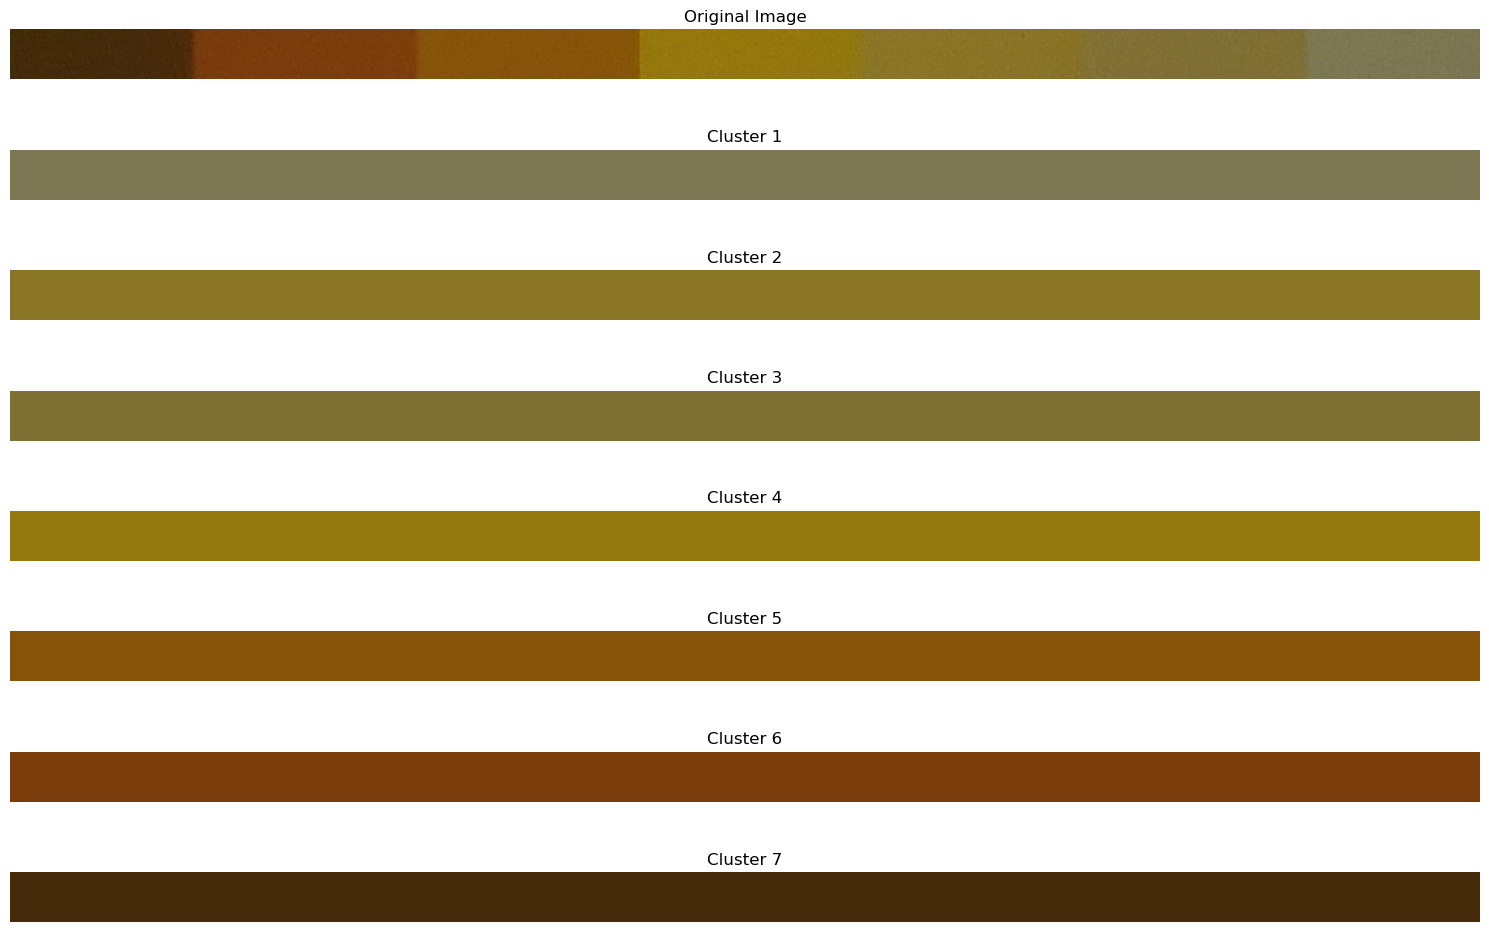

Colors of the reordered clusters:
Cluster 1: RGB(124, 118, 82)
Cluster 2: RGB(138, 116, 38)
Cluster 3: RGB(127, 112, 52)
Cluster 4: RGB(147, 120, 13)
Cluster 5: RGB(133, 84, 9)
Cluster 6: RGB(123, 60, 12)
Cluster 7: RGB(69, 43, 10)


In [176]:
image_path = "/Users/wanc/Desktop/Data Analytics/ImageLab_1/image_crop/Data/cropped_image.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image_rgb.reshape(-1, 3)

num_clusters = 7 
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(pixels)

cluster_centers = kmeans.cluster_centers_

cluster_centers = cluster_centers[np.argsort(np.mean(cluster_centers, axis=1))]

sorted_kmeans = KMeans(n_clusters=num_clusters, random_state=0, init=cluster_centers)
sorted_kmeans.fit(pixels)

new_order = [6, 5, 4, 3, 2, 1, 0]

reordered_labels = np.array([new_order[label] for label in sorted_kmeans.labels_])

reordered_colors = sorted_kmeans.cluster_centers_[new_order].astype(int)

cluster_color_images = [np.full_like(image_rgb, color) for color in reordered_colors]

plt.figure(figsize=(15, 10))
plt.subplot(num_clusters + 1, 1, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

for i, cluster_color_image in enumerate(cluster_color_images):
    plt.subplot(num_clusters + 1, 1, i + 2)
    plt.imshow(cluster_color_image)
    plt.title(f"Cluster {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Colors of the reordered clusters:")
for i, color in enumerate(reordered_colors):
    print(f"Cluster {i + 1}: RGB({color[0]}, {color[1]}, {color[2]})")

In [177]:
import cv2
import numpy as np
from scipy.spatial import distance
import os

color_clusters = {
    '1': [124, 118, 82],
    '2': [138, 116, 38],
    '3': [127, 112, 52],
    '4': [147, 120, 13],
    '5': [133, 84, 9],
    '6': [123, 60, 12],
    '7': [69, 43, 10],
}

def find_closest_color(target_color):
    closest_color = None
    min_distance = float('inf')
    
    for cluster_name, cluster_color in color_clusters.items():
        dist = distance.euclidean(target_color, cluster_color)
        if dist < min_distance:
            min_distance = dist
            closest_color = cluster_name
    
    return closest_color

def analyze_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    average_color = np.mean(image, axis=(0, 1)).astype(int)  # Calculate average color
    
    closest_color_name = find_closest_color(average_color)
    
    return closest_color_name

image_folder = "/Users/wanc/Desktop/Data Analytics/ImageLab_1/image_crop/Data/Target"

for image_filename in os.listdir(image_folder):
    if image_filename.endswith(('.png')):
        image_path = os.path.join(image_folder, image_filename)
        closest_color = analyze_image(image_path)
        print(f"Image: {image_filename} similar to cluster: {closest_color}")

Image: 204020264.png similar to cluster: 1
Image: 203250164.png similar to cluster: 1
Image: 107100864.png similar to cluster: 1
Image: 103240664.png similar to cluster: 1
Image: 102240564.png similar to cluster: 1
Image: 402281063.png similar to cluster: 7
Image: 106100864.png similar to cluster: 1
Image: 110151064.png similar to cluster: 1
Image: 101081263.png similar to cluster: 1
Image: 111091164.png similar to cluster: 1
Image: 201250164.png similar to cluster: 7
Image: 104050764.png similar to cluster: 1
Image: 404081263.png similar to cluster: 7
Image: 105050764.png similar to cluster: 1
Image: 109270864.png similar to cluster: 1
Image: 401211063.png similar to cluster: 7


In [178]:
import cv2
import numpy as np
from scipy.spatial import distance
import os

color_clusters = {
    '1': [124, 118, 82],
    '2': [138, 116, 38],
    '3': [127, 112, 52],
    '4': [147, 120, 13],
    '5': [133, 84, 9],
    '6': [123, 60, 12],
    '7': [69, 43, 10],
}

def find_closest_color(target_color):
    closest_color = None
    min_distance = float('inf')
    
    for cluster_name, cluster_color in color_clusters.items():
        dist = distance.euclidean(target_color, cluster_color)
        if dist < min_distance:
            min_distance = dist
            closest_color = cluster_name
    
    return closest_color

def cal_avg_color(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    average_color = np.mean(image, axis=(0, 1)).astype(int)
    return average_color

def analyze_image(image_path):
    average_color = cal_avg_color(image_path)
    closest_color_name = find_closest_color(average_color)
    return closest_color_name

image_folder = "/Users/wanc/Desktop/Data Analytics/ImageLab_1/image_crop/Data/Target"

for image_filename in os.listdir(image_folder):
    if image_filename.endswith(('.png')):
        image_path = os.path.join(image_folder, image_filename)
        closest_color = analyze_image(image_path)
        average_color = cal_avg_color(image_path)
        print(f"Image: {image_filename} Average Color: {average_color} Similar to cluster: {closest_color}")

Image: 204020264.png Average Color: [172 179 182] Similar to cluster: 1
Image: 203250164.png Average Color: [191 190 186] Similar to cluster: 1
Image: 107100864.png Average Color: [188 191 196] Similar to cluster: 1
Image: 103240664.png Average Color: [181 183 186] Similar to cluster: 1
Image: 102240564.png Average Color: [194 196 201] Similar to cluster: 1
Image: 402281063.png Average Color: [2 1 0] Similar to cluster: 7
Image: 106100864.png Average Color: [201 205 207] Similar to cluster: 1
Image: 110151064.png Average Color: [186 188 193] Similar to cluster: 1
Image: 101081263.png Average Color: [186 188 194] Similar to cluster: 1
Image: 111091164.png Average Color: [176 177 182] Similar to cluster: 1
Image: 201250164.png Average Color: [20 16  7] Similar to cluster: 7
Image: 104050764.png Average Color: [189 191 196] Similar to cluster: 1
Image: 404081263.png Average Color: [7 6 3] Similar to cluster: 7
Image: 105050764.png Average Color: [169 169 169] Similar to cluster: 1
Image: 

In [179]:
import cv2
import numpy as np
from scipy.spatial import distance
import os

color_clusters = {
    '1': [124, 118, 82],
    '2': [138, 116, 38],
    '3': [127, 112, 52],
    '4': [147, 120, 13],
    '5': [133, 84, 9],
    '6': [123, 60, 12],
    '7': [69, 43, 10],
}

def find_closest_color(target_color):
    closest_color = None
    min_distance = float('inf')
    
    for cluster_name, cluster_color in color_clusters.items():
        dist = distance.euclidean(target_color, cluster_color)
        if dist < min_distance:
            min_distance = dist
            closest_color = cluster_name
    
    return closest_color

def cal_avg_color(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    average_color = np.mean(image, axis=(0, 1)).astype(int)
    return average_color

def analyze_image(image_path):
    average_color = cal_avg_color(image_path)
    closest_color_name = find_closest_color(average_color)
    return closest_color_name

image_folder = "/Users/wanc/Desktop/Data Analytics/ImageLab_1/image_crop/Data/Target"

data = []

for image_filename in os.listdir(image_folder):
    if image_filename.endswith(('.png')):
        image_path = os.path.join(image_folder, image_filename)
        closest_color = analyze_image(image_path)
        average_color = cal_avg_color(image_path)
        data.append({'Image Filename': image_filename, 'Average Color': average_color, 'Closest Color': closest_color})
        print(f"Image: {image_filename} Average Color: {average_color} Similar to cluster: {closest_color}")
    
df = pd.DataFrame(data)

csv_path = "/Users/wanc/Desktop/Data Analytics/ImageLab_1/image_crop/predict.csv"

df.to_csv(csv_path, index=False)

print("DataFrame saved to CSV:", csv_path)

Image: 204020264.png Average Color: [172 179 182] Similar to cluster: 1
Image: 203250164.png Average Color: [191 190 186] Similar to cluster: 1
Image: 107100864.png Average Color: [188 191 196] Similar to cluster: 1
Image: 103240664.png Average Color: [181 183 186] Similar to cluster: 1
Image: 102240564.png Average Color: [194 196 201] Similar to cluster: 1
Image: 402281063.png Average Color: [2 1 0] Similar to cluster: 7
Image: 106100864.png Average Color: [201 205 207] Similar to cluster: 1
Image: 110151064.png Average Color: [186 188 193] Similar to cluster: 1
Image: 101081263.png Average Color: [186 188 194] Similar to cluster: 1
Image: 111091164.png Average Color: [176 177 182] Similar to cluster: 1
Image: 201250164.png Average Color: [20 16  7] Similar to cluster: 7
Image: 104050764.png Average Color: [189 191 196] Similar to cluster: 1
Image: 404081263.png Average Color: [7 6 3] Similar to cluster: 7
Image: 105050764.png Average Color: [169 169 169] Similar to cluster: 1
Image: 

In [180]:
results = pd.read_csv("/Users/wanc/Desktop/Data Analytics/ImageLab_1/image_crop/rslt.csv")
predict = pd.read_csv("/Users/wanc/Desktop/Data Analytics/ImageLab_1/image_crop/predict.csv")
results.head()

,ID\tMobile phone\tScore
0,101081263\tIphone XS max\t1
1,102240564\tIphone XS max\t3
2,103240664\tiphone XS max\t4
3,104050764\tiphone XS max\t3
4,105050764\tIphone XS max\t7


In [181]:
predict.head()

,Image Filename,Average Color,Closest Color
0,204020264.png,[172 179 182],1
1,203250164.png,[191 190 186],1
2,107100864.png,[188 191 196],1
3,103240664.png,[181 183 186],1
4,102240564.png,[194 196 201],1


In [182]:
results = results['ID\tMobile phone\tScore'].str.split('\t', expand=True)
results.head()

,0,1,2
0,101081263,Iphone XS max,1
1,102240564,Iphone XS max,3
2,103240664,iphone XS max,4
3,104050764,iphone XS max,3
4,105050764,Iphone XS max,7


In [183]:
predict['Filename'] = predict['Image Filename'].str.split('.png').str[0]

In [184]:
results.rename(columns={results.columns[0]: 'Filename'}, inplace=True)
results.rename(columns={results.columns[2]: 'Score'}, inplace=True)
results.head()

,Filename,1,Score
0,101081263,Iphone XS max,1
1,102240564,Iphone XS max,3
2,103240664,iphone XS max,4
3,104050764,iphone XS max,3
4,105050764,Iphone XS max,7


In [185]:
#predict.rename(columns={predict.columns[0]: 'Filename'}, inplace=True)
predict.rename(columns={predict.columns[2]: 'Score'}, inplace=True)
predict.head()

,Image Filename,Average Color,Score,Filename
0,204020264.png,[172 179 182],1,204020264
1,203250164.png,[191 190 186],1,203250164
2,107100864.png,[188 191 196],1,107100864
3,103240664.png,[181 183 186],1,103240664
4,102240564.png,[194 196 201],1,102240564


In [186]:
results.head()

,Filename,1,Score
0,101081263,Iphone XS max,1
1,102240564,Iphone XS max,3
2,103240664,iphone XS max,4
3,104050764,iphone XS max,3
4,105050764,Iphone XS max,7


In [187]:
predict.drop(columns=['Image Filename', 'Average Color'], inplace=True)
predict.head()

,Score,Filename
0,1,204020264
1,1,203250164
2,1,107100864
3,1,103240664
4,1,102240564


In [188]:
predict = predict[['Filename','Score']]
predict.head()

,Filename,Score
0,204020264,1
1,203250164,1
2,107100864,1
3,103240664,1
4,102240564,1


In [189]:
results.drop(columns=results.columns[1], inplace=True)
results.head()

,Filename,Score
0,101081263,1
1,102240564,3
2,103240664,4
3,104050764,3
4,105050764,7


In [190]:
df = pd.merge(predict, results, on='Filename', how='inner')

# Extract the 'Score' columns for comparison
scores_predict = df['Score_x']
scores_results = df['Score_y']

mse = mean_squared_error(scores_predict, scores_results)

rmse = sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 11.0
RMSE: 3.3166247903554
